# KNN Clustering with Diabetes data to predict who has diabetes 

KNN algorithm is a supervised machine learning algorithm that should be used with labeled data to perform classification or regression on datasets.The dataset I chose has measures of predictors of diabetes and the outcome of whether the person had diabetes or not. It is a great data set to be used with the KNN algorithm since it is labeled. This dataset was obtained from kaggle https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset. It has 9 columns , 8 of the columns are predictors and 1 column is the outcome or target variable. 

In [40]:
#libraries 
import pandas as pd 
import numpy as np

In [41]:
#get data into dataframe 
url = 'https://raw.githubusercontent.com/Diontay/datasources/main/diabetes.csv'
df = pd.read_csv(url)

In [42]:
#display first 10 rows 
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [43]:
#split data into attributes and labels 
y = df['Outcome']
X = df.drop(['Outcome'], axis =1)


In [44]:
# split data into train and test sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [45]:
# check shape of split data 
X_train.shape, X_test.shape

((537, 8), (231, 8))

In [46]:
# perform feature scaling for classification 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test =  scaler.transform(X_test)

In [47]:
# fit classifier to data 
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [48]:
# predict class of test data 
y_prediction = classifier.predict(X_test)

In [49]:
# get accuracy score of classifier 
accuracy = classifier.score(X_test, y_test)
print(accuracy)

0.6883116883116883


The accuracy score with the default k value is about 69%. 

              precision    recall  f1-score   support

           0       0.71      0.85      0.77       144
           1       0.63      0.41      0.50        87

    accuracy                           0.69       231
   macro avg       0.67      0.63      0.64       231
weighted avg       0.68      0.69      0.67       231



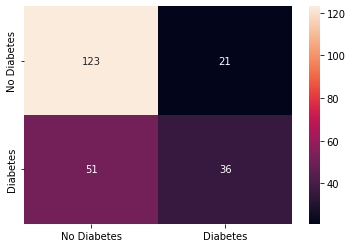

In [50]:
#obtain confusion matrix and classification report 

from sklearn.metrics import classification_report, confusion_matrix

category = ['No Diabetes', 'Diabetes']
matrix = pd.DataFrame(confusion_matrix(y_test, y_prediction), 
                  columns=category, index = category)


import seaborn as sns
sns.heatmap(matrix, annot=True, fmt='d')

print(classification_report(y_test, y_prediction))



# Finding the best kvalue for the classifier

In [51]:
# find the best K value for this model 
f1s= []

from sklearn.metrics import f1_score
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)

    f1s.append(f1_score(y_test, pred_i, average='weighted'))    


In [52]:
print(f1s)

[0.6896008721458421, 0.6393308104851694, 0.6871310507674142, 0.6310496543054682, 0.6705464346973781, 0.6466689936569455, 0.6759637838502192, 0.6526440511357833, 0.6942193453234463, 0.6738703625601722, 0.6963782696177063, 0.687012987012987, 0.7131806082116641, 0.6907104564907659, 0.6854238928773089, 0.6775285320739867, 0.6928916494133885, 0.6693821577542507, 0.6910218074960046]


Text(0, 0.5, 'F1 Score')

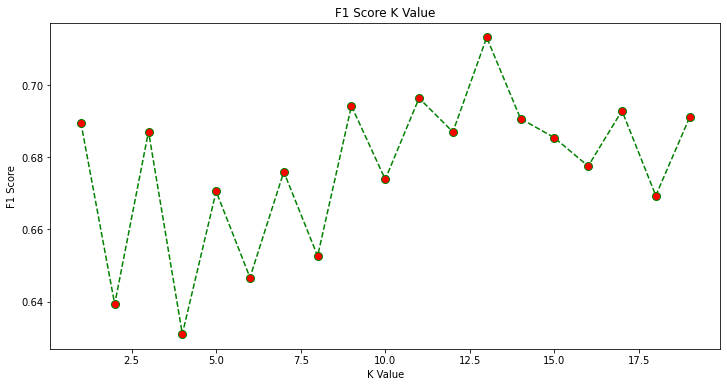

In [53]:
# plot to determine best k value 
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), f1s, color='green', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [54]:
#find the exact value of kvalue 
f1s= []

from sklearn.metrics import f1_score
for i in range(12, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)

    f1s.append(f1_score(y_test, pred_i, average='weighted'))  

Text(0, 0.5, 'F1 Score')

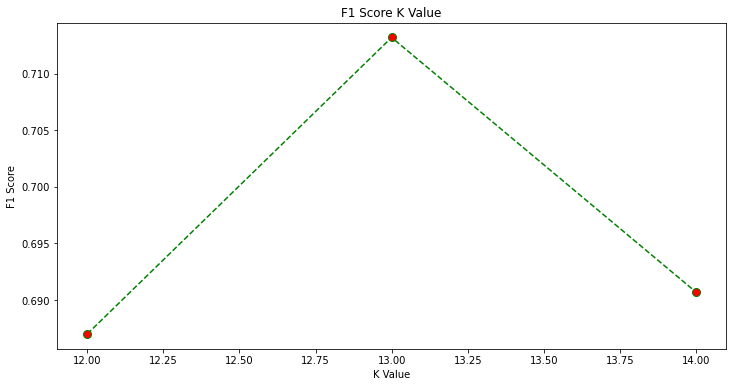

In [55]:

plt.figure(figsize=(12, 6))
plt.plot(range(12, 15), f1s, color='green', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

A k value of 13 seems to give the best f1 score 

In [56]:
# fit classifier to data 


classifier2 = KNeighborsClassifier(13)
classifier2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [57]:
# predict class of test data 
y_prediction2 = classifier2.predict(X_test)

In [58]:
# get accuracy score of classifier 
accuracy2 = classifier2.score(X_test, y_test)
print(accuracy2)

0.7316017316017316


A k value of 13 produced a accuracy score of 73% which is higher than the defualt k value of of 5 with a accuracy score of 69%. 

              precision    recall  f1-score   support

           0       0.73      0.90      0.81       144
           1       0.74      0.45      0.56        87

    accuracy                           0.73       231
   macro avg       0.73      0.68      0.68       231
weighted avg       0.73      0.73      0.71       231



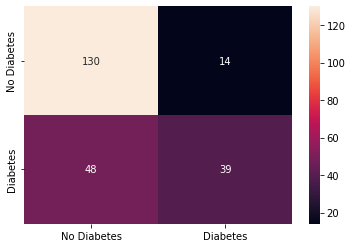

In [59]:
#obtain confusion matrix and classification report of new classifier 



category = ['No Diabetes', 'Diabetes']
matrix = pd.DataFrame(confusion_matrix(y_test, y_prediction2), 
                  columns=category, index = category)


import seaborn as sns
sns.heatmap(matrix, annot=True, fmt='d')

print(classification_report(y_test, y_prediction2))